In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Input,Lambda
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import load_model

In [7]:
IMAGE_SIZE=[224,224]

train_path= "E:/Machine Learning/Machine Learning/Neural Networks/CNN/Chest X-Ray/chest_xray/train"
test_path= "E:/Machine Learning/Machine Learning/Neural Networks/CNN/Chest X-Ray/chest_xray/test"

In [8]:
vgg= VGG16(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

In [12]:
for layer in vgg.layers:
    layer.trainable=False

In [14]:
folders= glob("E:/Machine Learning/Machine Learning/Neural Networks/CNN/Chest X-Ray/chest_xray/train/*")
folders



['E:/Machine Learning/Machine Learning/Neural Networks/CNN/Chest X-Ray/chest_xray/train\\NORMAL',
 'E:/Machine Learning/Machine Learning/Neural Networks/CNN/Chest X-Ray/chest_xray/train\\PNEUMONIA']

In [15]:
x= Flatten()(vgg.output)

In [18]:
prediction= Dense(len(folders),activation="softmax")(x)

model= Model(inputs=vgg.input,outputs=prediction)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [17]:
train_datagen= ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen= ImageDataGenerator(rescale=1./255)

In [18]:
training_set= train_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/Chest X-Ray/chest_xray/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 5216 images belonging to 2 classes.


In [19]:
test_set= train_datagen.flow_from_directory("E:/Machine Learning/Machine Learning/Neural Networks/CNN/Chest X-Ray/chest_xray/test",
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 624 images belonging to 2 classes.


In [26]:
history= model.fit_generator(training_set,
                            validation_data=test_set,
                            epochs=5,
                            steps_per_epoch=len(training_set),
                            validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 163 steps, validate for 20 steps
Epoch 1/5
163/163 [==============================] - 1503s 9s/step - loss: 0.2213 - accuracy: 0.9195 - val_loss: 0.3084 - val_accuracy: 0.8878
Epoch 2/5
163/163 [==============================] - 1436s 9s/step - loss: 0.1186 - accuracy: 0.9555 - val_loss: 0.4005 - val_accuracy: 0.8782
Epoch 3/5
163/163 [==============================] - 1440s 9s/step - loss: 0.1010 - accuracy: 0.9643 - val_loss: 1.0594 - val_accuracy: 0.7131
Epoch 4/5
163/163 [==============================] - 1442s 9s/step - loss: 0.0814 - accuracy: 0.9712 - val_loss: 0.9777 - val_accuracy: 0.7420
Epoch 5/5
163/163 [==============================] - 1442s 9s/step - loss: 0.0700 - accuracy: 0.9749 - val_loss: 0.4569 - val_accuracy: 0.8798


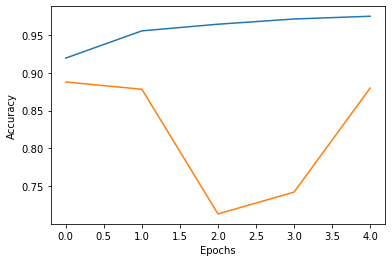

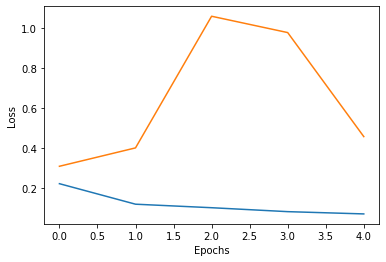

In [30]:
train_acc= history.history["accuracy"]
train_loss= history.history["loss"]
test_acc= history.history["val_accuracy"]
test_loss= history.history["val_loss"]

plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.figure()

plt.plot(train_loss)
plt.plot(test_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [31]:
model.save("vgg16_chest.h5")

# Prediction

In [28]:
from tensorflow.keras.preprocessing import image
# path= "val/NORMAL/n3.jpeg"
path= "val/PNEUMONIA/person1954_bacteria_4886.jpeg"
img = image.load_img(path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print("Confidence : ",classes[0].round())
if classes[0][0]>0.5:
    print("Person is Normal")
elif classes[0][1]>0.5:
    print("Person has Pneumonia")
elif classes[0][0]<0.5:
    print("Person has Pneumonia")
else:
    print("Person is Normal")

Confidence :  [0. 1.]
Person has Pneumonia


In [13]:
model=load_model("vgg16_chest.h5")

In [20]:
model.evaluate(test_set)

  ...
    to  
  ['...']
20/20 [==============================] - 291s 15s/step - loss: 0.4778 - accuracy: 0.8622


[0.477828036993742, 0.86217946]